# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitation">Limitation</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> For this project, I chose **'TMDB Movie Data'**. After importing .csv file and initial quick investigation, I found the followings:
>
> The main columns in this data set are:
 - **Definitive characters of each movie**, including: *id, imdb_id, original_title, cast, home_page, tagline*
 - **Director, Casts, production_Companies, genres, release_date, runtime and budget** of each movie
 - **Some metrics for each movie**, including: *revenue*, *popularity*, *vote_count*, *vote_average*
>
> Some initial thoughts that I had to finalize the research questions that I could potentially answer to them for this study was to see:
>
> **What is the relationship between revenue generation, popularity and vote average(considered as dependent variable) and other parameters of a movie like: budget, direcot/cast/production_company, release_year, release_month and genres (which are independent variables)**
> 
> Initial investigation showed that number of individual directors are a lot in such a way grouping data by name of director and making conclusion based on that was not so conclusive. So I decided to don't consider director name as an individual variable.
>
> In addition, by investigating through "Genres" column I found most movies has more than one genres. So I decided to consider only the first genre in the list (using `split('|')[0]`) as the "main_genre" and just in case if I required to investigate some questions based on genre, consider main_genre created in this way.
>
> I will consdier **Vote_Average** and **Revenue** as independent variables and try to find the parameters which has impact on them.
>
> More specifically here are questions that I am trying to find answer for them:
>
> (*In some of the following research questions, instead of Revenue, my main focus was on **Profit** which is new generated column as `profit = Revenue-Budget`*)
>
> **Considering Vote_Average as Dependent Variable:**
- Research Question 1: which genre has highest vote_average in all years?
>
> **Considering Revenue as Dependent Variable:**
- Research Question 2: Relation between Revenue and release_year?
- Research Question 3: Relation between Profit and release_year ?
- Research Question 4: Relation between Profit and runtime ?

In [4]:
# first thing first, importing required packages that I want to work with them in my analysisimport numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling


### Data Wrangling Step1 and Step 2: Data Gathering and Data Assessment
> Data Wrangling has three main steps: 1. Data Gathering 2. Data Assessment and 3. Data Cleaning.
>
> in the following block codes, after importing data (Data Gathering step) I started Data Assessment.
> 
> **tmdb_movies.csv** is original data for this project and by using `read_csv` function I imported this *csv* file. The next step is **Data Assessment**. By using `head()`, `shape`, `info()`, `duplicated()`, I tried to understand general information of data such as number of rows/columns, data type in each column and number of missing data in each column.

In [18]:
# loading data:
df=pd.read_csv('tmdb_movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [20]:
df.shape

(10866, 21)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [25]:
df.duplicated().sum()

1

In [43]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Summary of Data Assessment:**


>- from `info` section, I found *homepage*,*tagline* and *keywords* columns has too many missing data. As these columns are not helpful in my future investigation, I will delete these three columns in **cleaning** section of this study.
>
>- Although there are not too many missing data in *overview* column, but as I am not going to use it in my future analysis, I will delete this column completely and permanently as well(by permanently in this notebook I mean `inplace=True`). This assumption and logic will be impleted for *imdb_id* and I will delete this column as well
>- In addition, there are some missing data for *cast* and *director* columns. In reality, these two parameters (i.e. cast and directors), most probably has strong relationship with some of movie metrics such as revenue. The most accurate way to make sure our analysis is capturing the impact of directors and cost on revenue (and other metrics) is to fill these missing values with right data, but for this study, I will drop the missing value cells in these two columns (again in **cleaning** section of this report). what I have said  for *case* and *director* is valid for *production_compay* and *genres* as well and I will drop the rows with missing values in *production_company* and *genres* as well. In summary, after completely/permanently droping previously mentioned columns, I will use `df.dropna()` to get rid of all null values in my data set as I don't have any plan to fill out null data with some specific values.
>- There is only one line of data which is duplicated. I will consider this line to be deleted in **cleaning** section as well.
>
>- *release_date*  column data type is string and I will change data type to date for this column.
>- After double checking the "popularity" columns in EDA section, I found, Max value is absolutely out of range in comparison to other descriptive statistics. I will remove the values which are out of range.
>- For Budget, Revenue and accordingly in later steps for calculating **Profit**, I have decided to replace zero valus with *mean* of each column. Other alternatives such as dropping these zero values was evaluated as well, but eventually I have decided to replace them with mean value.




### Data Wrangling Step 3: Data Cleaning 
> in this section, I will impletement what I have summarized in **Data Assessment** section.

In [34]:
# drop [homepage,tagline,keywords and overview] completely and permanently
df.drop(['homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [36]:
# drop 'imdb_id' as it is not useful for future investigation.
df.drop(['imdb_id'], axis=1, inplace=True)

In [38]:
#drop duplicate rows. I initially checked how many duplicated rows I have in original data
# and there was just one row which was repeated.
df.drop_duplicates(inplace=True)

In [40]:
#check_point: double check new row and column after droping some columns and dublicated rows.
df.shape

(10865, 16)

In [53]:
#drop all rows with missing values
df.dropna(inplace=True)

In [54]:
df.shape

(9772, 16)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
 14  budget_adj            9772 non-null   float64
 15  revenue_adj         

Next Step in Data Cleaning, was to convert **release_date** data format from *string* to *date* format. (that was a bit more challenging than what I thought). 

**I should emphasize on this fact that  I knew I have release_year column in my original data and most probably release_year was enough for what I want to analyze, but just to CHALLENGE myself, I decided to convert data type for release_date column.**

in the following line of codes I will explain step by steb what I did specifically at each step.

In [132]:
#step1: comparing 'release_date' and 'release_year' columns
# I just wanted to compare release_date and release_year and make sure release_year is good enough for my future investigation.
df[['release_date','release_year']]

,release_date,release_year
0,6/9/15,2015
1,5/13/15,2015
2,3/18/15,2015
3,12/15/15,2015
4,4/1/15,2015
...,...,...
10861,6/15/66,1966
10862,12/21/66,1966
10863,1/1/66,1966
10864,11/2/66,1966


In [133]:
#step2: I used "to_datetime" function to convert date time from string to date format. 
# I created temporary column (Series) for this purpose (the name of this temp column is 'test')
#at the end of my analysis I will replace release_date with this column and will drop it.



df['test']=pd.to_datetime(df['release_date']) 



Challenge started here: years are written in 2 digit format in original data type (e.g. 69 for 1969)
for some reason,Pandas didn't recognize years before 1970 (e.g. instead of converting 69 to 1969, 69 converted to 2069).

In [537]:
df[['test','release_date']]

In [175]:
# Step3: To resolve this issue; 
#I created another temporary DataFrame (below) for the columns that I had this issue:
df_temp1=df[(df['test'] >= '2060-01-01') & (df['test'] <= '2069-12-31')]

In [176]:
# a quick test
df_temp1.shape

(347, 17)

In [177]:
# Step 4: here I subtracted 100 years from years 
#(e.g. 2069 will be converted to 1969 based on following line of code)
df_temp1['test'] = df_temp1['test'].apply(lambda x: x - pd.DateOffset(years=100))

C:\Users\Khajeh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
# a quick test
df_temp1['test'].min()

Timestamp('1960-01-01 00:00:00')

In [179]:
# another quick test.
df_temp1['test'].max()

Timestamp('1969-12-29 00:00:00')

In [184]:
# step5: in this step based on following lines  I replaced the rows in original DataFrame(i.e in df) 
#with the one that  I implemented these changes.
#these replacement is based on index of rows in df_temp, so first I found the indeces as follow:
indices=df_temp1.index

In [194]:
#replacing 'test' column in df by 'test' column in df_temp but just for specific indices.
df.loc[indices,'test'] = df_temp1['test']


In [195]:
#quick test
df['test'].max()

Timestamp('2015-12-31 00:00:00')

In [196]:
# Step 6: Eventually, I replaced 'release_date' with 'test' and 
#permanently drop the 'test' column which is not applicable anymore.
df['release_date']=df['test']

In [197]:
df['release_date'].min()

Timestamp('1960-01-01 00:00:00')

In [198]:
df['release_date'].max()

Timestamp('2015-12-31 00:00:00')

In [199]:
#permanent drop of 'test' column.
df.drop('test',axis=1,inplace=True)

In [200]:
#another test to make sure shape of main DataFrame is consistent with what I had before this format change.
df.shape

(9772, 16)

In [201]:
#check to make sure release_date format has been changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

In [202]:
#At the end of cleaning phase, I saved a copy of what I did so far
df.to_csv('tmdb_movies_clean.csv',index=False)

In [5]:
df=pd.read_csv('tmdb_movies_clean.csv')

*THIS IS END OF DATA CLEANING AND ACCORDINGLY DATA WRANGLING STEP*

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which Genre has the highest vote_average ?

I just tried to visualize these two variables individually and find relation between them

Text(0.5, 1.0, 'vote_average histrogram')

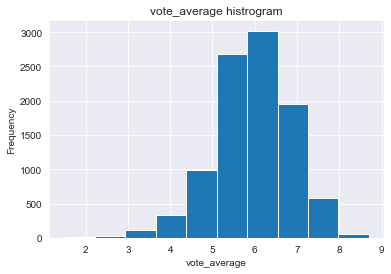

In [41]:
df['vote_average'].hist();
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.title('vote_average histrogram')

vote_average is skewed to the left, which means that most of values in this column are on higher end side values.

As explained before, here, I am creating new column and name it as **main_genre**. This column include only the first genre of all genres listed in genres column for each movie.

In [35]:
df['main_genre']=df['genres'].apply(lambda x: x.split('|')[0])

In [257]:
# a quick test to make sure new column is added
df.shape

(9772, 17)

Text(0.5, 1.0, 'Cumulative main_genre count for all years')

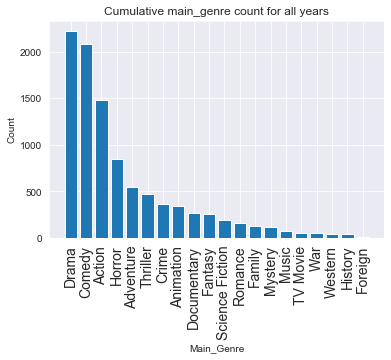

In [43]:
main_genre_counts=df['main_genre'].value_counts()
plt.bar(main_genre_counts.index,main_genre_counts);
plt.xticks(fontsize=14, rotation=90);
plt.xlabel('Main_Genre')
plt.ylabel('Count')
plt.title('Cumulative main_genre count for all years')

In [45]:
vote_ave_median=df.groupby('main_genre')['vote_average'].median()

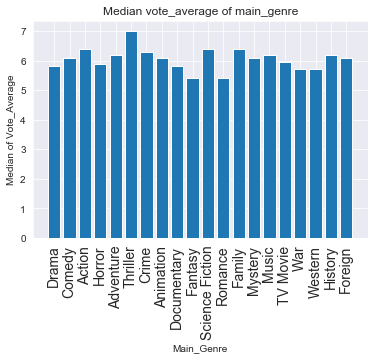

In [49]:
plt.bar(main_genre_counts.index,vote_ave_median);
plt.xticks(fontsize=14, rotation=90);
plt.xlabel('Main_Genre')
plt.ylabel('Median of Vote_Average')
plt.title('Median vote_average of main_genre');

>from the last plot, it could be observed that **Documentary** genre, has the highest median of vote_average in comparison to all other genres.
>
>another conclusion that could be made from the last two plots is: *vote_average* order and *value_counts* of different genres are not aligned with each other.

Just as an another practice, I tried to put both of prevoius plots in same plot. I am 100% confident that in next coming lessons I can make the following plot much more beautiful :) .

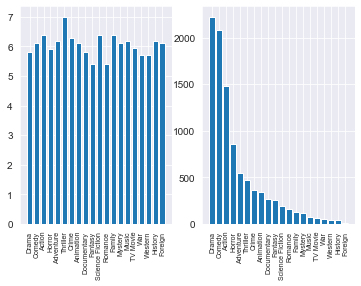

In [311]:
plt.subplot(1,2,1)
plt.bar(main_genre_counts.index,vote_ave_median)
plt.xticks(fontsize=7, rotation=90);
plt.subplot(1,2,2)
plt.bar(main_genre_counts.index,main_genre_counts);
plt.xticks(fontsize=7, rotation=90);

###  Research Question 2: Relationship between revenue_adj and release_year

The first task that I will do here is to replace zero values in revenue and budget with zero values. Of course this step(i.e. replacing zeros with mean value) is related to "Data Wrangling" Phase, but referring to this fact that Data Analysis phases are not restrict sequential, I found I need to replace zero values with mean for this research question.

In [8]:
df[df['budget']==0]['budget'].value_counts()

0    4751
Name: budget, dtype: int64

As could be seen, number of zero values in this column was a bit large (4751) which is almost 50% of our values. So That's the reason that I decided to replace these zero values with mean instead of dropping them. Of course, some other more accurate ways (regression maybe ?) could be used here, but for now I just decided to replace them with mean. 

In [9]:
df['budget']=df['budget'].mask(df['budget'] == 0,df['budget'].mean())

In [11]:
#test to see if there is still zero values in 'budget' column or not:
df[df['budget']==0]['budget'].value_counts()

Series([], Name: budget, dtype: float64)

I will repeat the same process for revenue and also for revenue_adj and budget_adj (the last two ones are the columns that I will work with them later on).

In [14]:
df['budget_adj']=df['budget_adj'].mask(df['budget_adj'] == 0,df['budget_adj'].mean())

In [15]:
df['revenue']=df['revenue'].mask(df['revenue'] == 0,df['revenue'].mean())

In [ ]:
df['budget']=df['budget'].mask(df['budget'] == 0,df['budget'].mean())

In [16]:
df['revenue_adj']=df['revenue_adj'].mask(df['revenue_adj'] == 0,df['revenue_adj'].mean())

To find relationship between `revenue_adj` and `release_year`, first I grouped the data by `release_year`. I considered several kinds of aggregation statistics (including: mean, median, min and max) and eventually I decided to consider maximum of revenue for each year.

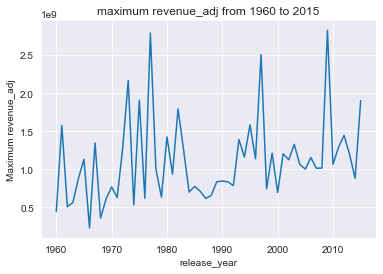

In [51]:
df.groupby('release_year').max()['revenue_adj'].plot();
plt.xlabel('release_year')
plt.ylabel('Maximum revenue_adj')
plt.title('maximum revenue_adj from 1960 to 2015');

from the above plot it could be concluded that max of revenue generation per year is not necessarily increasing over the time. the plot shows in some specific years the revenue is considerably higher than the other years. In the next research question, I was curious to see what about profit which is revenue subtracted from Budget associate with crearing that movie. again I considered max profitability as a metric for this investigation.

### Research Question 3: Relationship between profit_adj and release_year


In [20]:
#first creating new column which is profit_adj:
df['profit_adj']=df['revenue_adj']-df['budget_adj']

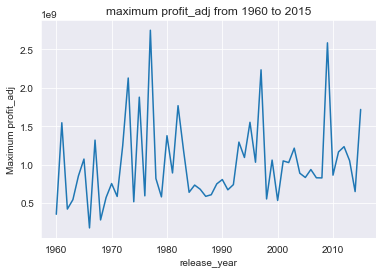

In [52]:
#then creating a line chart for max of profitability for each year like what I did for revenue_adj:
df.groupby('release_year').max()['profit_adj'].plot();
plt.xlabel('release_year')
plt.ylabel('Maximum profit_adj')
plt.title('maximum profit_adj from 1960 to 2015');

The trend is so similar to the trend obtained from Research Question 2 analysis, Which means that it should be high correlation between Revenue Generation and Profit associate with that. In the following plots, I tried to investigate more distribution of cost, distribution of revenue and confirm that higher revenue is associate with higher profit.

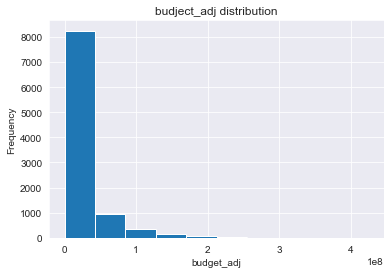

In [55]:
df['budget_adj'].hist()
plt.xlabel('budget_adj')
plt.ylabel('Frequency')
plt.title('budject_adj distribution');

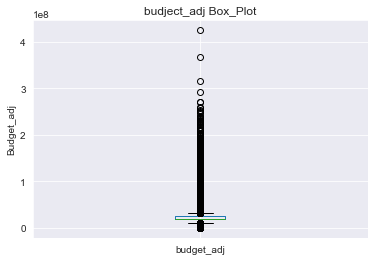

In [59]:
df['budget_adj'].plot(kind='box')

plt.ylabel('Budget_adj')
plt.title('budject_adj Box_Plot');

from Box plot and Bar chart shown for budget_adj, it could be concluded that distribution of budget_adj is pretty uniform and that is one reason why the higher revenue is associate with higher profitability. in the following scatter plot the relationship between max profit and max revenue for each year is plotted

In [24]:
max_yearly_profit=df.groupby('release_year').max()['profit_adj']
max_yearly_revenue=df.groupby('release_year').max()['revenue_adj']


Here I am using `concat` to glue two data series in to one new data frame.

In [25]:
df_max=pd.concat([max_yearly_profit, max_yearly_revenue], axis=1)

In [26]:
# a quick test
df_max.head()

,profit_adj,revenue_adj
release_year,,
1960,3.539024e+08,4.423780e+08
1961,1.545635e+09,1.574815e+09
1962,4.216943e+08,5.045914e+08
1963,5.439729e+08,5.617734e+08
1964,8.534745e+08,8.780804e+08


And here is scatter plot of profit_adj vs. revenue_adj: it is so clear that it is direct relationship between revenue_adj and profit_adjusted **IF** we assume that maximum yearly revenue and maximum yearly profit is going to be representative of yearly revenue and yearly profit.

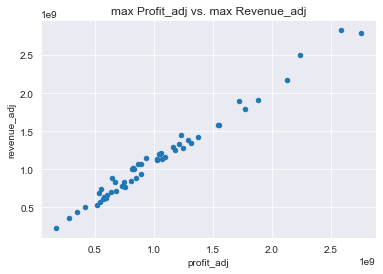

In [60]:
df_max.plot.scatter(x='profit_adj',y='revenue_adj');

plt.title('max Profit_adj vs. max Revenue_adj');

### Research Question 4: Relationship between Profit and runtime

For the last part, I was just curious to see if there is a relationship between runtime and profitability ? I mean, can we conclude that the higher runtime of the movie is associated with higher revenue and accordingly associate with higher profit (as we concluded that max revenue of each year is highly correlated with max profit of each year).for that purpose, I created two Series: one of them maximum of profit per year and the other one maximum of run time per year. Again, here my focus on aggregate function is `.max()` which means that I am going to **assume** that max profit and max runtime correlation is representative of correlation between runtime and profit. 

In [28]:
max_yearly_profit=df.groupby('release_year').max()['profit_adj']
max_yearly_runtime=df.groupby('release_year').max()['runtime']

Then I concatanate these two series to find correlation between them:

In [29]:
df_runtime=pd.concat([max_yearly_profit, max_yearly_runtime], axis=1)

and eventually plotting scatterplot of these two series:

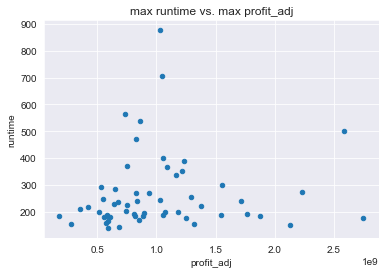

In [61]:
df_runtime.plot.scatter(x='profit_adj',y='runtime');

plt.title('max runtime vs. max profit_adj');

Although the positive correlation could be observed from above plot, but it is not so significant and it can not be strongly conclude that runtime is highly correlated with profit.

<a id='limitation'></a>
## Limitation

I was dealing with some limitations which resulted in making some assumptions for my analysis. Having access to more information may result in making more precise conclusion. in this section I am listing the main limitations that I was dealing with them in my analysis:
1. for **genres** column: I had multiple genres for each movie. I was curious to investigate my result based on main genre. I didn't have access to single genre for each movie and accordingly I just assume that the first genre in list of genres for each movie is representative of main genre. further investigation was based on this genre.
2. for **revenue**, **budget** and accordingly for **profit** I put all genres in the same basket. another alternative was to consider each genre in the same basket and perform revenue/profit analysis for each genre separately.
3. I replaced zero values in **revenue** and **budget** by mean of these columns. I didn't have enough information about why these values are reported as zero. Of course there are some better ways to replace these zero values but as I didn't have access to more information and as total number of zeros for these two variables was high enough, I didn't drop them and I found replacing them with mean value is the most reasonable approach to take.
4. For the groupby section,`max()` aggregation is considered. This is another assumption that I was not 100% sure if this is true or not. Again, limited knowledge about movie industry resulted in just assuming that max() could be representative of revenue and budget for the whole year.



<a id='conclusions'></a>
## Conclusions

After Initial investigation and Data Wrangling section: I was interested to see:
- **Which Genre has the highest vote_average ?** 
>- for this purpose I first created `main_genre` column by *Assuming* that the first genre in genres is the main one. The main conclusion obtained from this investigation was: **The higher the number of genre is NOT associated with higher vote_average** In my analysis, I found **Drama** had highest number of main_genre among all movies while **Thriller** genre was the genre with the highest vote_average.

- **Relationship between revenue_adj and release_year** 
>- Before plotting, I was expecting to see positive trend of increase in maximum revenue of a movie over the years, but after plotting max_revenue for each year, I found it is not clear trend in max_revenue over as a function of time. in next question I was curious to find the same relationship for profit over the years.

- **Relationship between profit_adj and release_year** 
>- After creating new column (Profit) I just tried to do the same as I did for revenue but this time with profit. the shape of profit over time was so similar to revenue over time. The initial hypothesis was the budget may not be significantly difference for the movies with max_revenue each year and after further investigation I found this hypothesis is true. I finished the analysis in this research quesiton by making this conclusion that: **strong correlation exists between max profit and max revenue over the year**.

- **Relationship between profit_adj and runtime** 
>- Eventually, I was interested to see if the profit (max profit for each year) is correlated with max runtime ? what I found was: Although there is positive correlation between these two variables, but the correlation was not so significant.

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!